# Cleaning and preparing the data for model training

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) 
against various products of different categories. They have shared purchase summary of various customers for selected
high volume products from last month. The data set also contains customer demographics (age, gender, marital status,
city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from 
last month.Now, they want to build a model to predict the purchase amount of customer against various products which will
help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the dataset/read the train datasets
df_train=pd.read_csv('black Friday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
##  import the test data/read the test datasets
df_test=pd.read_csv('black Friday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
##MErge both train and test data/append it /combine the test datasets and train daatsets
df=df_train.append(df_test)
df.head()

C:\Users\nikit\AppData\Local\Temp\ipykernel_16964\2572318242.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
#it is used to find the whole information about the number,names of columns and their datatypes it contained..Here
#numerical features include only float and int datatypes...object datatypes i.e categorical features contains alphabets,
#numeric+alphabets ,range values etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe() ##It describes all about the numerical features only i.e int and float datatypes describe about count,
                #mean,max,standard deviation,25%,50%,75%.

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'],axis=1,inplace=True)   ##drop the unnecessary column i.e id which include the user_id because 
                                            #it does not affect output feature axis=1 means remove it column wise and 
                                            #axis=0 means remove row wise inplace=True means drop the column and 
                                            #automatically update the df value.

In [77]:
df.drop(['Product_ID'],axis=1,inplace=True)

In [78]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,0,16,4,0,8,8.0,16.0,7969.0,0,1


In [79]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


# First fix the categorical features 

#convert categorical values into numeric values i.e start the encoding in automatic 
#we do encoding like label encoding, ordinal encoding, One hot encoding i.e we give the ranking..but manually 
#we do manual mapping. we will do encoding if the number of unique features is more and manual mapping if no. of features is less.

In [12]:
##HAndling categorical feature Gender i.e convert it into numeric value
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
## Handle categorical feature Age i.e convert it into numeric value
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [36]:
#First technique
#df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [38]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0], dtype=int64)

In [80]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,0,16,4,0,8,8.0,16.0,7969.0,0,1


In [40]:
## Handle categorical feature City_category i.e convert it into numeric value

df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [41]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)  #only two categories efficient to represent the column,
                                                                  #so drop the first category

In [42]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [43]:
df=pd.concat([df,df_city],axis=1)                           #Now combine/add both the columns columnwise.

In [81]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,0,16,4,0,8,8.0,16.0,7969.0,0,1


In [45]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,0,16,4+,0,8,NaN,NaN,7969.0,0,1


In [60]:
## Handle categorical feature Stay_In_Current_City_Years i.e convert it into numeric value
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [61]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')             #Replace + by space

C:\Users\nikit\AppData\Local\Temp\ipykernel_16964\2796944430.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')             #Replace + by space


In [82]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,0,16,4,0,8,8.0,16.0,7969.0,0,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


In [65]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [68]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


In [85]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,0,16,4,0,8,8.0,16.0,7969.0,0,1


# Handle the duplicates

In [116]:
df.duplicated().sum()

188372

In [117]:
df.drop_duplicates(keep='first',inplace=True)    ##Drop the duplicates value

In [118]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,0,16,4,0,8,8.0,16.0,7969.0,0,1


In [120]:
df.duplicated().sum()                            ##No duplicates value reamined

0

# Handle the missing values

In [121]:
df.isnull().sum()

Gender                            0
Age                               0
Occupation                        0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                      57566
B                                 0
C                                 0
dtype: int64

In [47]:
##Product_category_2, product_category_3 and purchase these columns have missing values.

In [49]:
## Focus on replacing missing values                           #First handle the Product_Category_2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [50]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [51]:
df['Product_Category_2'].mode()[0]                  ##Find the mode value of the column Product_Category_2

8.0

In [52]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [53]:
df['Product_Category_2'].isnull().sum()                           #There is no missing values

0

In [55]:
df['Product_Category_3'].unique()                                #handle the Product_Category_2

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [56]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [57]:
df['Product_Category_3'].mode()[0]                  ##Find the mode value of the column Product_Category_3

16.0

In [58]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [59]:
df['Product_Category_2'].isnull().sum()                           #There is no missing values

0

# Visualisation

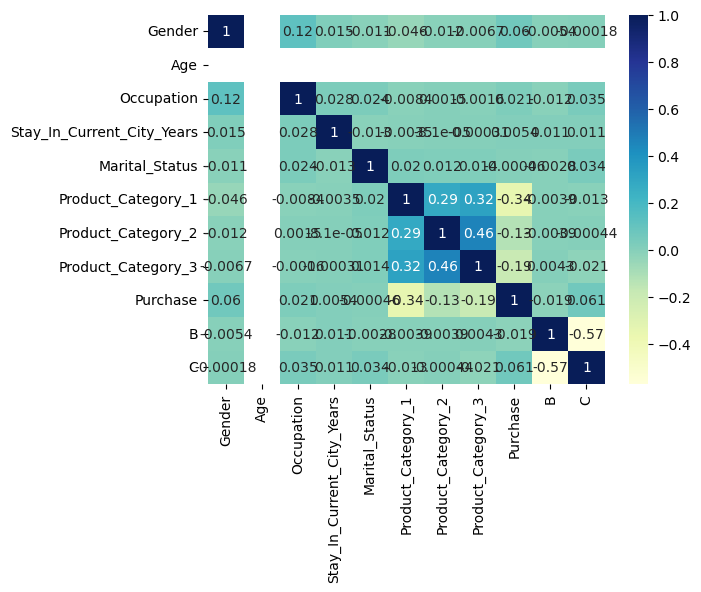

In [107]:
## correlation  between each features with each other
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

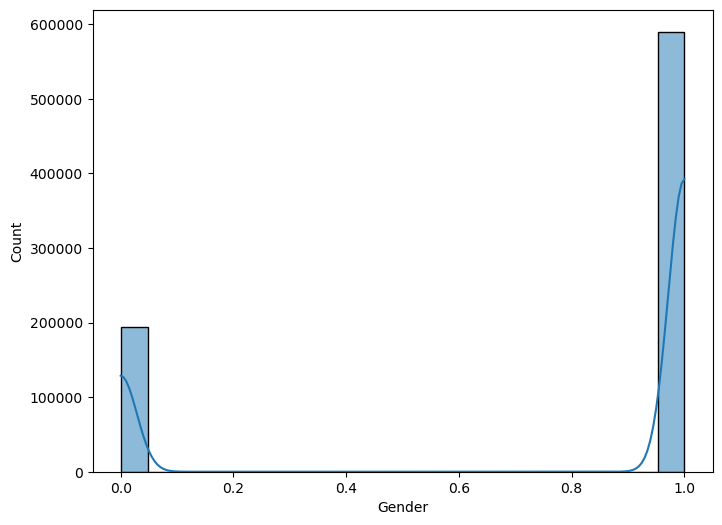

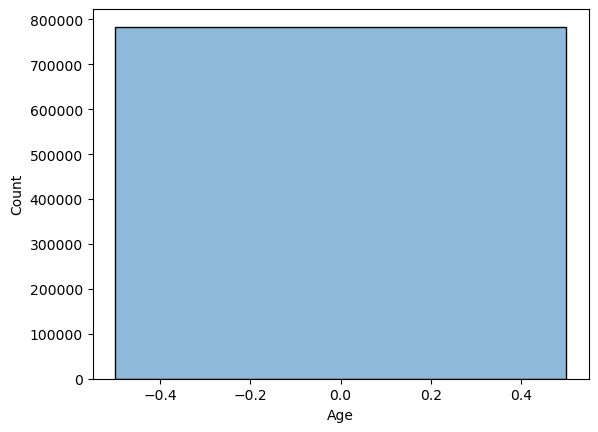

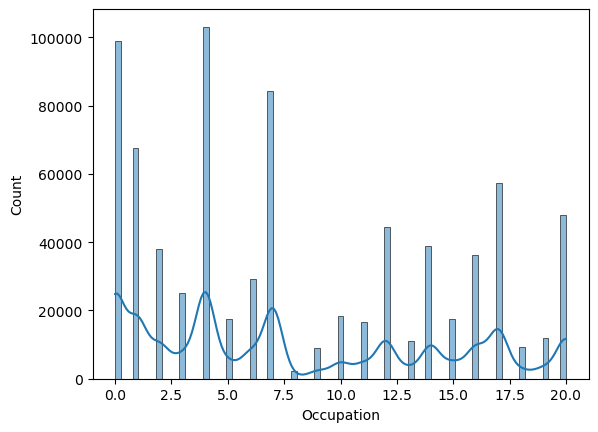

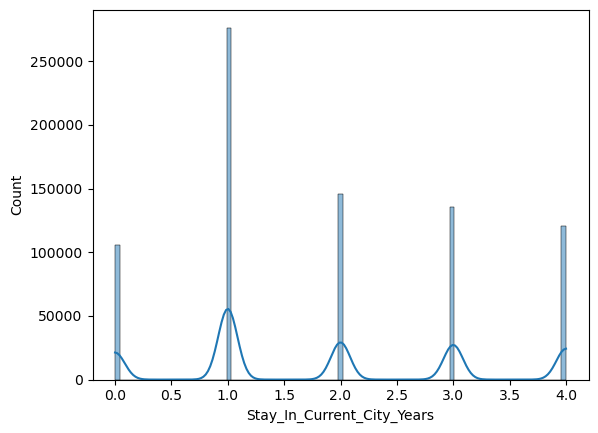

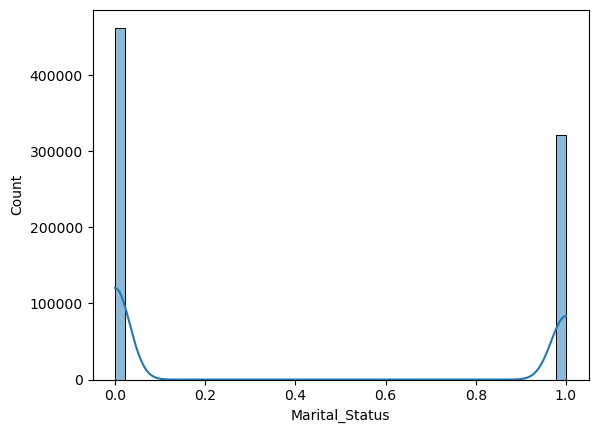

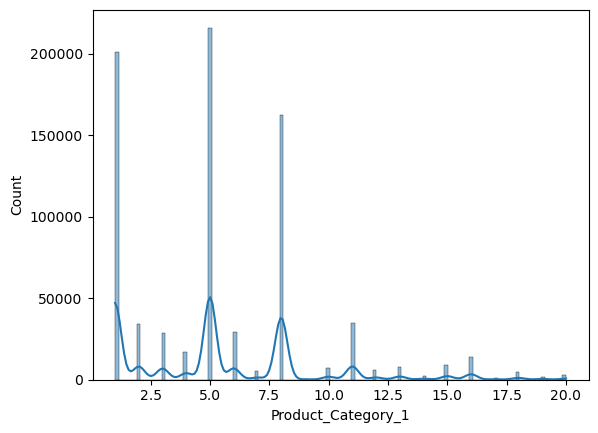

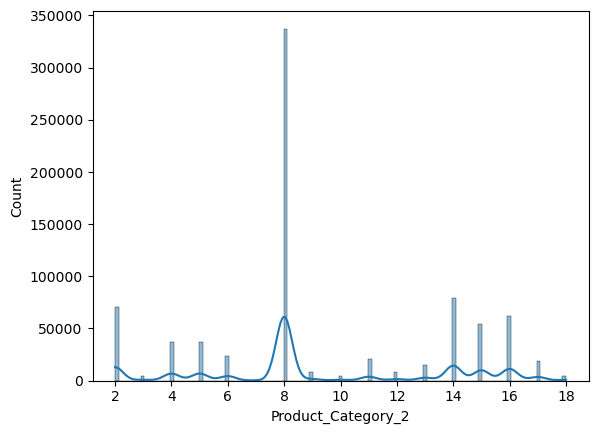

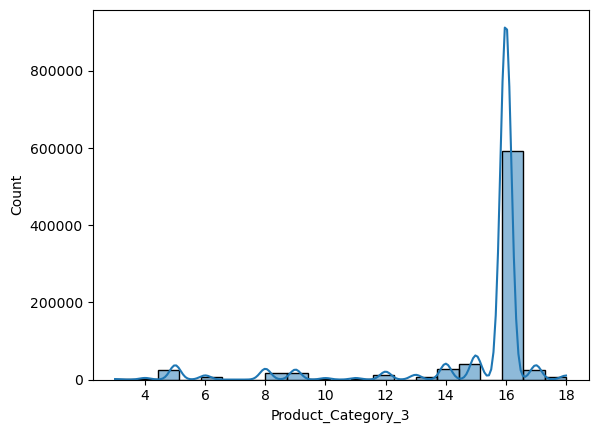

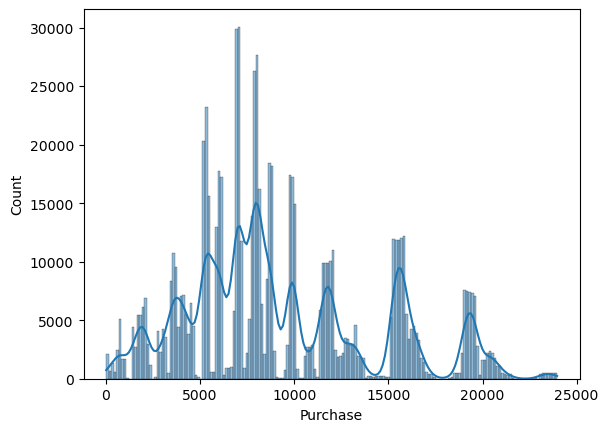

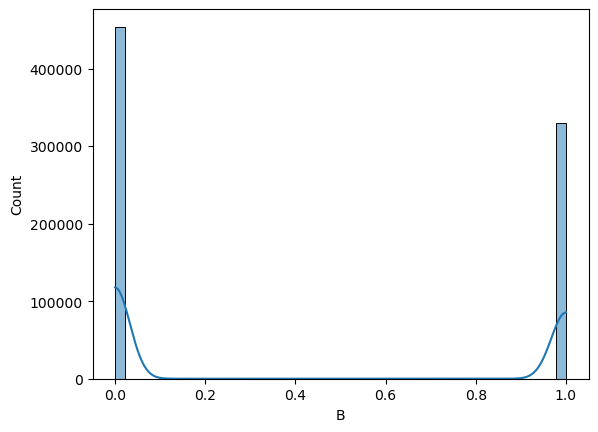

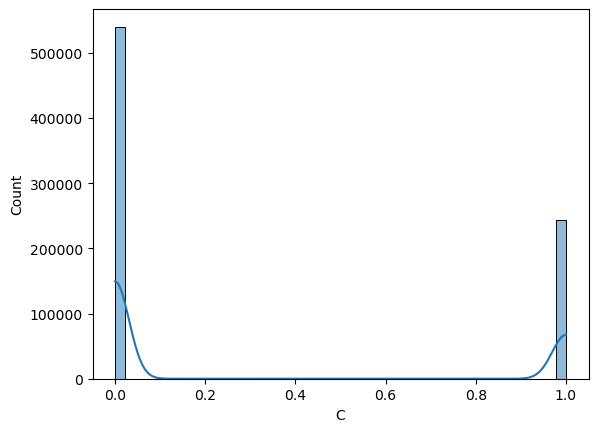

In [112]:
plt.figure(figsize=(8,6))     ##Histogram plot of all numeric columns to analyze the counts
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

# Feature Scaling 

In [87]:
df_test=df[df['Purchase'].isnull()]                         ##all data of purchase column which is null is the test dataset.

In [88]:
df_train=df[~df['Purchase'].isnull()]                ##all data of purchase column which is not null is the train dataset. 

In [99]:
X=df_train.drop('Purchase',axis=1)

In [100]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8.0,16.0,0,0
1,0,0,10,2,0,1,6.0,14.0,0,0
2,0,0,10,2,0,12,8.0,16.0,0,0
3,0,0,10,2,0,12,14.0,16.0,0,0
4,1,0,16,4,0,8,8.0,16.0,0,1


In [101]:
X.shape

(550068, 10)

In [102]:
y=df_train['Purchase']

In [103]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [104]:
y.shape

(550068,)

In [105]:
from sklearn.model_selection import train_test_split                        ## Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
## feature Scaling  i.e do the standardization i.e find the z-score..it is only done on the input train and test datasets
#For train datasets apply both fit and transform and for test datasets apply only the transform.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)